In [282]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [283]:
df=pd.read_csv('Churn Modeling.csv')

In [284]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [285]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [286]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [287]:
temp = pd.DataFrame(index=df.columns)
temp['type']=df.dtypes
temp['count_null']=df.isnull().sum()
temp['unique']=df.nunique()

In [288]:
temp

,type,count_null,unique
RowNumber,int64,0,10000
CustomerId,int64,0,10000
Surname,object,0,2932
CreditScore,int64,0,460
Geography,object,0,3
Gender,object,0,2
Age,int64,0,70
Tenure,int64,0,11
Balance,float64,0,6382
NumOfProducts,int64,0,4


<AxesSubplot:>

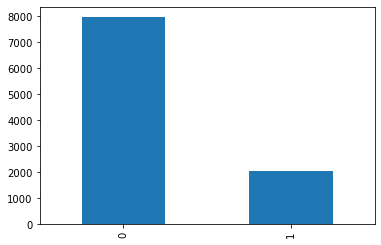

In [289]:
df['Exited'].value_counts().plot.bar()

Text(0.5, 0, 'C_Score')

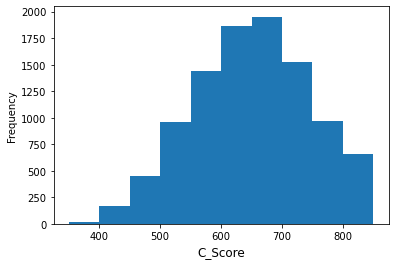

In [290]:
df['CreditScore'].plot.hist()
plt.xlabel('C_Score',fontsize=12)

Text(0.5, 0, 'Age')

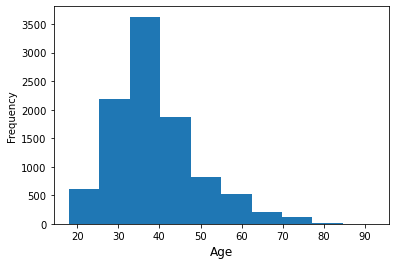

In [291]:
df['Age'].plot.hist(bins=10)
plt.xlabel('Age',fontsize=12)

In [292]:
df.shape

(10000, 14)

In [293]:
df=pd.get_dummies(df)

In [294]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [295]:
x = df.drop(['Exited'],axis=1)
y = df['Exited']

In [296]:
x.shape,y.shape

((10000, 2947), (10000,))

In [297]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=46,stratify = y)

In [298]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((7500, 2947), (2500, 2947), (7500,), (2500,))

In [299]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [300]:
cols = train_x.columns
cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zubarev', 'Surname_Zubareva', 'Surname_Zuev', 'Surname_Zuyev',
       'Surname_Zuyeva', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object', length=2947)

In [301]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled =pd.DataFrame(train_x_scaled,columns=cols)
train_x_scaled.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.970994,0.468573,0.450,0.527027,0.8,0.549773,0.000000,1.0,1.0,0.422358,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.077816,0.817128,0.658,0.229730,0.8,0.475024,0.000000,0.0,0.0,0.606050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.663233,0.856894,0.688,0.175676,0.5,0.000000,0.000000,1.0,0.0,0.177925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.536507,0.833649,0.378,0.283784,0.2,0.000000,0.333333,1.0,1.0,0.240915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.981896,0.216002,0.416,0.175676,0.7,0.000000,0.000000,1.0,0.0,0.991382,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [302]:
train_x

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9709,9710,15682839,575,57,8,137936.94,1,1,1,84475.13,...,0,0,0,0,0,1,0,0,1,0
779,780,15769974,679,35,8,119182.73,1,0,0,121210.09,...,0,0,0,0,0,0,0,1,1,0
6632,6633,15779915,694,31,5,0.00,1,1,0,35593.18,...,0,0,0,0,0,0,0,1,0,1
5365,5366,15774104,539,39,2,0.00,2,1,1,48189.94,...,0,0,0,0,0,0,0,1,0,1
9818,9819,15619699,558,31,7,0.00,1,1,0,198269.08,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4986,15742681,554,26,4,121365.39,1,1,1,8742.36,...,0,0,0,0,0,0,1,0,0,1
8333,8334,15743709,683,30,4,66190.33,1,1,1,115186.97,...,0,0,0,0,0,1,0,0,0,1
1795,1796,15757648,683,35,5,95698.79,1,0,1,182566.76,...,0,0,0,0,0,0,1,0,1,0
8227,8228,15702434,850,30,3,0.00,2,1,0,116692.80,...,0,0,0,0,0,1,0,0,1,0


In [303]:
test_x_scaled = scaler.fit_transform(test_x)
test_x_scaled =pd.DataFrame(test_x_scaled,columns=cols)
test_x_scaled.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.527444,0.876438,0.922,0.175676,0.7,0.545090,0.000000,1.0,1.0,0.911900,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.705329,0.206371,0.388,0.351351,0.1,0.000000,0.333333,0.0,0.0,0.345564,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.378606,0.478407,0.490,0.378378,0.5,0.658742,0.333333,1.0,0.0,0.241322,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.172376,0.105344,0.470,0.283784,0.7,0.000000,0.333333,1.0,0.0,0.010938,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.917768,0.947180,0.516,0.391892,0.6,0.000000,0.000000,1.0,1.0,0.629755,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [304]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [305]:
logreg=LogReg()
logreg.fit(train_x_scaled,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [306]:
train_predict=logreg.predict(train_x_scaled)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [307]:
k = f1_score(train_predict,train_y)
print("The f1 score for train model is", k)

The f1 score for train model is 0.4525345622119815


In [308]:
test_predict = logreg.predict(test_x_scaled)
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
k = f1_score(test_predict,test_y)
print("The f1 score for test model is", k)

The f1 score for test model is 0.3342541436464089


In [310]:
train_predict = logreg.predict_proba(train_x_scaled)
train_predict

array([[0.56232885, 0.43767115],
       [0.59834957, 0.40165043],
       [0.92875232, 0.07124768],
       ...,
       [0.87962392, 0.12037608],
       [0.89348314, 0.10651686],
       [0.91760489, 0.08239511]])

In [311]:
train_preds = train_predict[:,1]
train_preds

array([0.43767115, 0.40165043, 0.07124768, ..., 0.12037608, 0.10651686,
       0.08239511])

In [312]:
for i in range(0,len(train_preds)):
    if(train_preds[i]>0.17):
        train_preds[i]=1.0
    else:
        train_preds[i]=0.0

In [313]:
k = f1_score(train_preds,train_y)
print("The developed f1 score is",k)

The developed f1 score is 0.545680546923555


In [314]:
k = f1_score(test_predict,test_y)
print("The developed f1 score is",k)

The developed f1 score is 0.3342541436464089


In [315]:
train_preds

array([1., 1., 0., ..., 0., 0., 0.])

In [316]:
train_y = train_preds

In [317]:
train_y

array([1., 1., 0., ..., 0., 0., 0.])

In [318]:
logreg.fit(train_x_scaled,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [319]:
Improved_train_predict=logreg.predict(train_x_scaled)
Improved_train_predict

array([1., 1., 0., ..., 0., 0., 0.])

In [320]:
k = f1_score(Improved_train_predict,train_y)
print("The f1 score for train model is", k)

The f1 score for train model is 0.9437442360897633


In [321]:
Improved_test_predict = logreg.predict(test_x_scaled)
Improved_test_predict

array([0., 1., 1., ..., 1., 1., 0.])

In [322]:
k = f1_score(Improved_test_predict,test_y)
print("The developed f1 score is",k)

The developed f1 score is 0.47535870243293826


In [323]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [324]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [325]:
colss = df.columns
colss

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zubarev', 'Surname_Zubareva', 'Surname_Zuev', 'Surname_Zuyev',
       'Surname_Zuyeva', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object', length=2948)

In [326]:
scaled_df = Scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=colss)
scaled_df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.0000,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0001,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0002,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0003,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0004,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0.162119,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,0.9997,0.016765,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.9998,0.075327,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,0.9999,0.466637,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [327]:
X = scaled_df.drop(['Exited'],axis=1)
Y = scaled_df['Exited']

In [328]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=56,stratify=Y)

In [329]:
from sklearn.tree import DecisionTreeClassifier

In [330]:
dt_model = DecisionTreeClassifier(max_depth=19,max_leaf_nodes=100,random_state=21)

In [331]:
dt_model.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=19, max_leaf_nodes=100, random_state=21)

In [332]:
dt_model.score(train_X,train_Y)

0.8929333333333334

In [333]:
dt_model.score(test_X,test_Y)

0.8548

In [334]:
test_predict = dt_model.predict_proba(test_X)

In [335]:
test_X_preds = test_predict[:,1]
test_X_preds

array([0.14285714, 0.90952381, 0.02153432, ..., 0.05263158, 0.97959184,
       0.07047279])

In [336]:
for i in range(0,len(test_X_preds)):
    if test_X_preds[i]>0.2:
        test_X_preds[i] = 1.0
    else:
        test_X_preds[i] = 0.0
        


In [337]:
from sklearn.metrics import accuracy_score

In [338]:
accuracy_score(test_X_preds,test_Y)

0.8084

In [339]:
accuracy_of_train = []
accuracy_of_test = []
for i in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=i,random_state=21)
    dt_model.fit(train_X,train_Y)
    accuracy_of_train.append(dt_model.score(train_X,train_Y))
    accuracy_of_test.append(dt_model.score(test_X,test_Y))
    

In [340]:
obs_df = pd.DataFrame({"Max Depth" : range(1,10) , "Accuracy_of_train" : accuracy_of_train , "Accuracy_of_test" : accuracy_of_test })
obs_df

,Max Depth,Accuracy_of_train,Accuracy_of_test
0,1,0.796267,0.7964
1,2,0.831733,0.8224
2,3,0.839867,0.8396
3,4,0.852133,0.8488
4,5,0.860400,0.8540
5,6,0.869067,0.8580
6,7,0.874267,0.8596
7,8,0.884000,0.8516
8,9,0.896267,0.8536


Text(0, 0.5, 'performance')

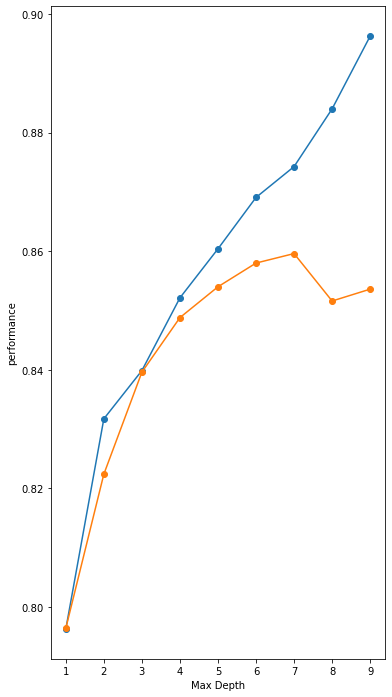

In [341]:
plt.figure(figsize=(6,12))
plt.plot(obs_df['Max Depth'],obs_df['Accuracy_of_train'],marker='o')
plt.plot(obs_df['Max Depth'],obs_df['Accuracy_of_test'],marker='o')
plt.xlabel('Max Depth')
plt.ylabel('performance')

In [342]:
accuracy_of_train = []
accuracy_of_test = []
for i in range(15,25):
    dt_model = DecisionTreeClassifier(max_leaf_nodes=i,random_state=21)
    dt_model.fit(train_X,train_Y)
    accuracy_of_train.append(dt_model.score(train_X,train_Y))
    accuracy_of_test.append(dt_model.score(test_X,test_Y))

In [343]:
obs_df = pd.DataFrame({"max_leaf_nodes" : range(15,25) , "Accuracy_of_train" : accuracy_of_train , "Accuracy_of_test" : accuracy_of_test })
obs_df

,max_leaf_nodes,Accuracy_of_train,Accuracy_of_test
0,15,0.861200,0.8600
1,16,0.861200,0.8600
2,17,0.861200,0.8600
3,18,0.861200,0.8600
4,19,0.861200,0.8600
5,20,0.861200,0.8600
6,21,0.861200,0.8600
7,22,0.861200,0.8600
8,23,0.861200,0.8600
9,24,0.861867,0.8596


Text(0, 0.5, 'performance')

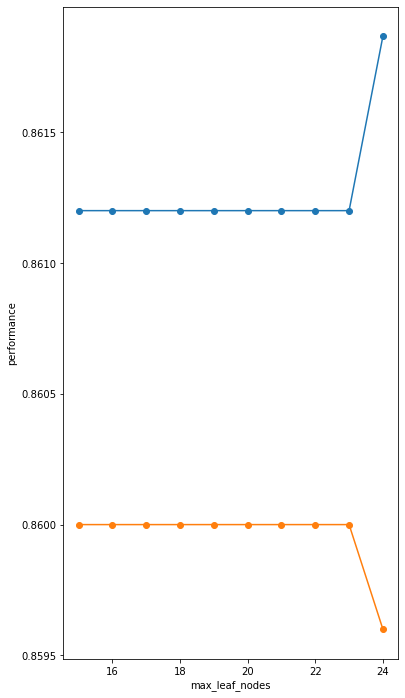

In [344]:
plt.figure(figsize=(6,12))
plt.plot(obs_df['max_leaf_nodes'],obs_df['Accuracy_of_train'],marker='o')
plt.plot(obs_df['max_leaf_nodes'],obs_df['Accuracy_of_test'],marker='o')
plt.xlabel('max_leaf_nodes')
plt.ylabel('performance')

In [345]:
dt_model = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=23,random_state=21)

In [346]:
dt_model.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=23, random_state=21)

In [347]:
dt_model.score(train_X,train_Y)

0.8612

In [348]:
dt_model.score(test_X,test_Y)

0.86

In [389]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features=12,n_estimators=200,max_depth=100)

In [390]:
rfc.fit(train_X,train_Y)

RandomForestClassifier(max_depth=100, max_features=12, n_estimators=200)

In [391]:
rfc.score(train_X,train_Y)

0.8410666666666666

In [392]:
rfc.score(test_X,test_Y)

0.8024

In [406]:
pd.Series(rfc.feature_importances_,index=train_X.columns)

RowNumber            0.034716
CustomerId           0.036566
CreditScore          0.040916
Age                  0.124128
Tenure               0.025484
                       ...   
Geography_France     0.013921
Geography_Germany    0.022415
Geography_Spain      0.008586
Gender_Female        0.013249
Gender_Male          0.013556
Length: 2947, dtype: float64